In [1]:
 #需导入的模块
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import datetime
from numpy import random #经常有用
import re
df=pd.read_csv('data/lianjia_chengjiao.csv',encoding='utf-8')#读取csv文件后，日期格式需要处理一下
str_datetime=lambda x:datetime.datetime.strptime(x,'%Y-%m-%d')
df['成交日期']=df['成交日期'].apply(str_datetime)

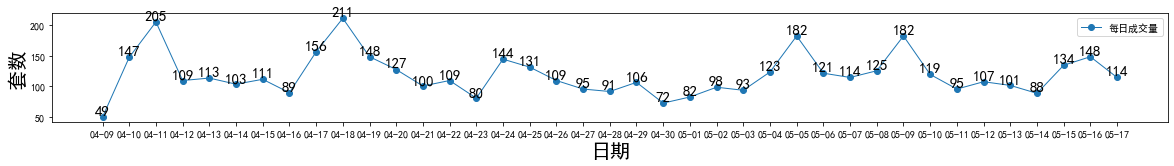

In [2]:
#获得每日成交量
df['count']=0
d=df.groupby(['成交日期']).count()['count']

import matplotlib.pyplot as plt
plt.rcParams['font.family']=['SIMHEI']
plt.figure(figsize=(20, 2))
plt.plot(d.index,d.values,label='每日成交量',linewidth=1,marker='o')
plt.xlabel('日期',fontsize=20)
plt.ylabel('套数',fontsize=20)
plt.xticks(d.index,list(map(lambda x:x.date().strftime('%m-%d'),d.index)))
plt.legend()
for x,y in zip(d.index,d.values):
    plt.text(x, y+0.05, y, ha='center', va= 'bottom',fontsize=15)
plt.show()
 

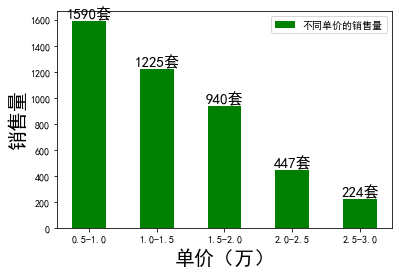

In [3]:
#获得某个单价区间的成交量
bins=[5000,10000,15000,20000,25000,30000]
cats=pd.cut(df['单价'],bins)
X=np.arange(1,6)
Y=pd.value_counts(cats).values
x_label=list(map(lambda x:str(x/10000)+'-'+str((x+5000)/10000),bins[:5]))
color=['red','black','peru','orchid','deepskyblue']
plt.rcParams['font.family']=['SIMHEI']
plt.bar(x=X,height=Y,align='center',width=0.5,label='不同单价的销售量',color='g')
plt.xticks(X,x_label)
plt.xlabel('单价（万）',fontsize=20)
plt.ylabel('销售量',fontsize=20)
plt.legend(loc='best')
for x,y in zip(X,Y):
    s=str(y)+'套'
    plt.text(x, y+0.05, s, ha='center', va= 'bottom',fontsize=15)
plt.show()

In [4]:
#获得某个小区的成交信息
try:
    df=df.drop(columns=['count'])
    dwj=df[df['小区'].apply(lambda x:'第五郡' in x and '公寓' not in x)]
    t=dwj.sort_values(['单价'])
    t.describe().round(0).unstack()
except KeyError as e:
    pass
dwj.sort_values(by=['成交日期'])

,小区,厅室,面积,总价,单价,成交日期,挂牌价,成交周期
4520,第五郡五号地,3室2厅,113.83,3260000,28605,2021-04-10,3350000,281
4534,第五郡一号地,3室1厅,133.86,2860000,21366,2021-04-10,2900000,1003
4541,第五郡一号地,2室1厅,97.25,2190000,22520,2021-04-10,2230000,15
2918,第五郡五号地,3室2厅,127.46,3380000,26519,2021-04-11,3480000,689
2488,第五郡一号地,3室2厅,122.39,2900000,23695,2021-04-14,2950000,11
1767,第五郡五号地,2室1厅,86.10,2180000,25320,2021-04-19,2240000,203
1735,第五郡三号地,2室2厅,90.93,2320000,25515,2021-04-20,2340000,260
1566,第五郡三号地,5室2厅,124.34,4500000,36192,2021-04-21,5000000,44
1354,第五郡五号地,4室2厅,170.62,4730000,27723,2021-04-23,4880000,308
1183,第五郡五号地,4室2厅,130.98,3720000,28402,2021-04-24,3790000,66
